Dataset shape: (6497, 13)
Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality', 'wine_type']
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3   

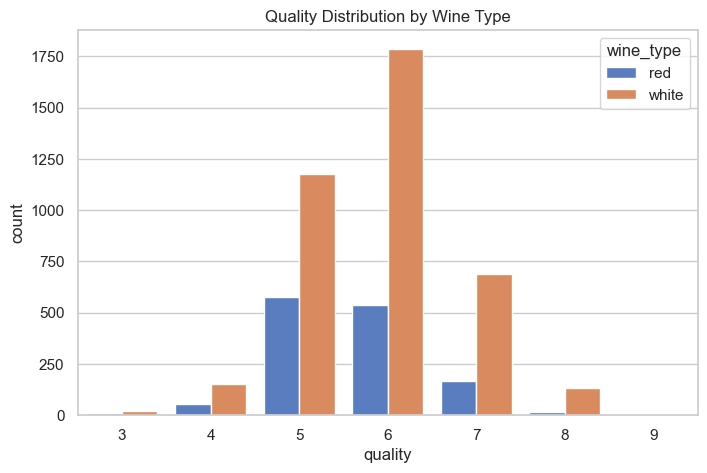

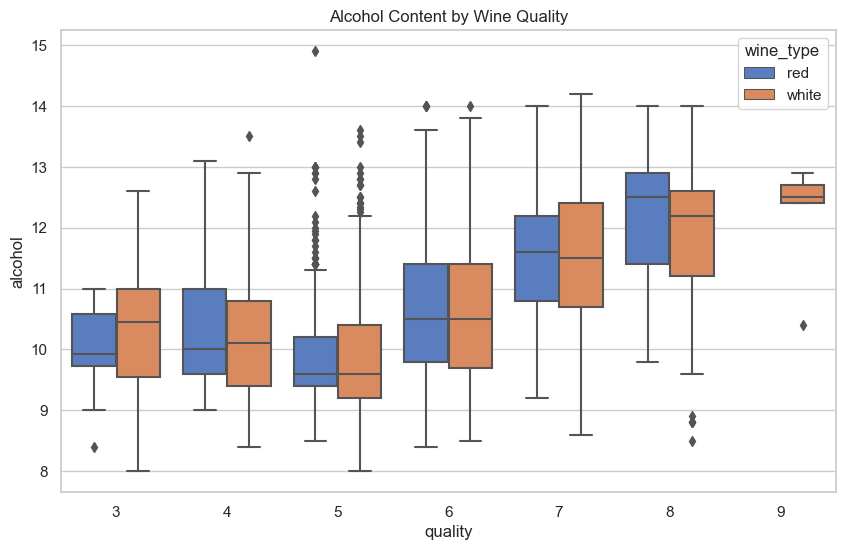

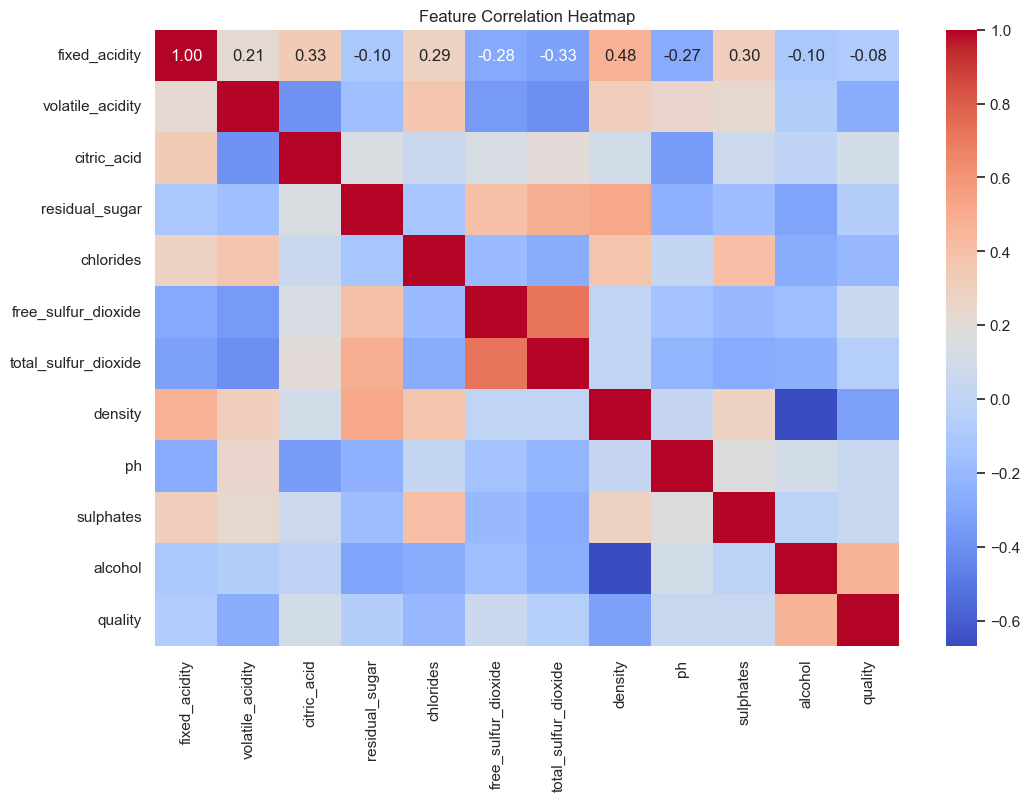

C:\Users\samia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


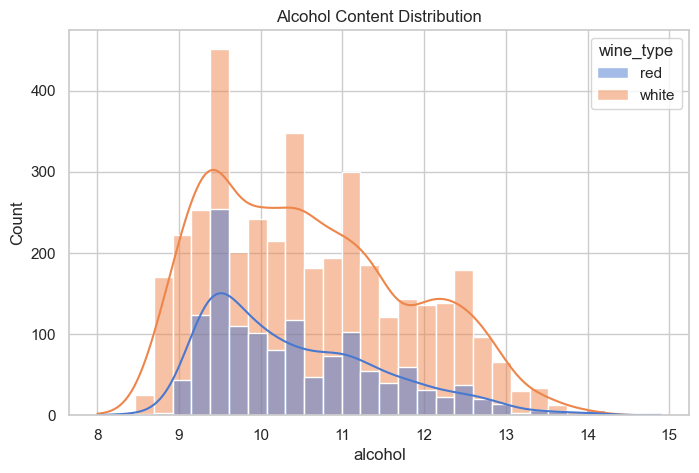

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add wine type
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine datasets
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

# Clean column names
wine_df.columns = wine_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview data
print("Dataset shape:", wine_df.shape)
print("Columns:", wine_df.columns.tolist())
print(wine_df.head())

# Check for missing values
print("\nMissing values per column:\n", wine_df.isnull().sum())

# Check for duplicates
num_duplicates = wine_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
wine_df = wine_df.drop_duplicates()

# Summary statistics
print("\nSummary statistics:\n", wine_df.describe())

# Value counts of quality
print("\nWine quality distribution:\n", wine_df['quality'].value_counts().sort_index())

# Create a quality label (optional - for classification task)
def quality_label(q):
    if q <= 4:
        return 'low'
    elif q <= 6:
        return 'medium'
    else:
        return 'high'

wine_df['quality_label'] = wine_df['quality'].apply(quality_label)

# ======================
# 📊 EDA Visualizations
# ======================

sns.set(style='whitegrid', palette='muted')

# Quality distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', hue='wine_type', data=wine_df)
plt.title('Quality Distribution by Wine Type')
plt.show()

# Boxplot: alcohol vs quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=wine_df)
plt.title('Alcohol Content by Wine Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = wine_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Compare alcohol content between red and white
plt.figure(figsize=(8, 5))
sns.histplot(data=wine_df, x='alcohol', hue='wine_type', bins=30, kde=True)
plt.title('Alcohol Content Distribution')
plt.show()


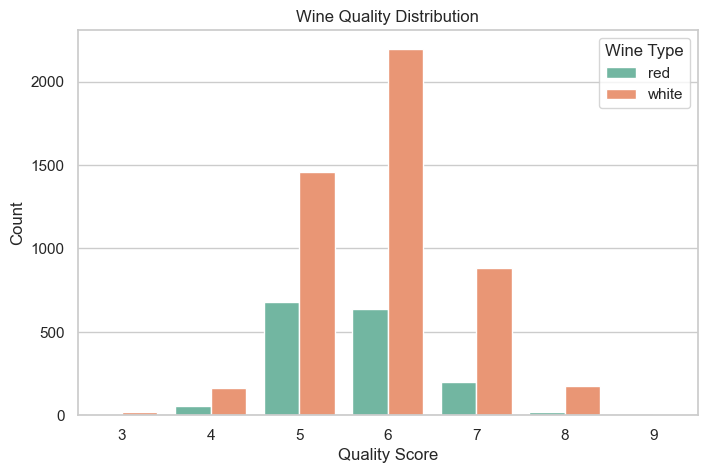

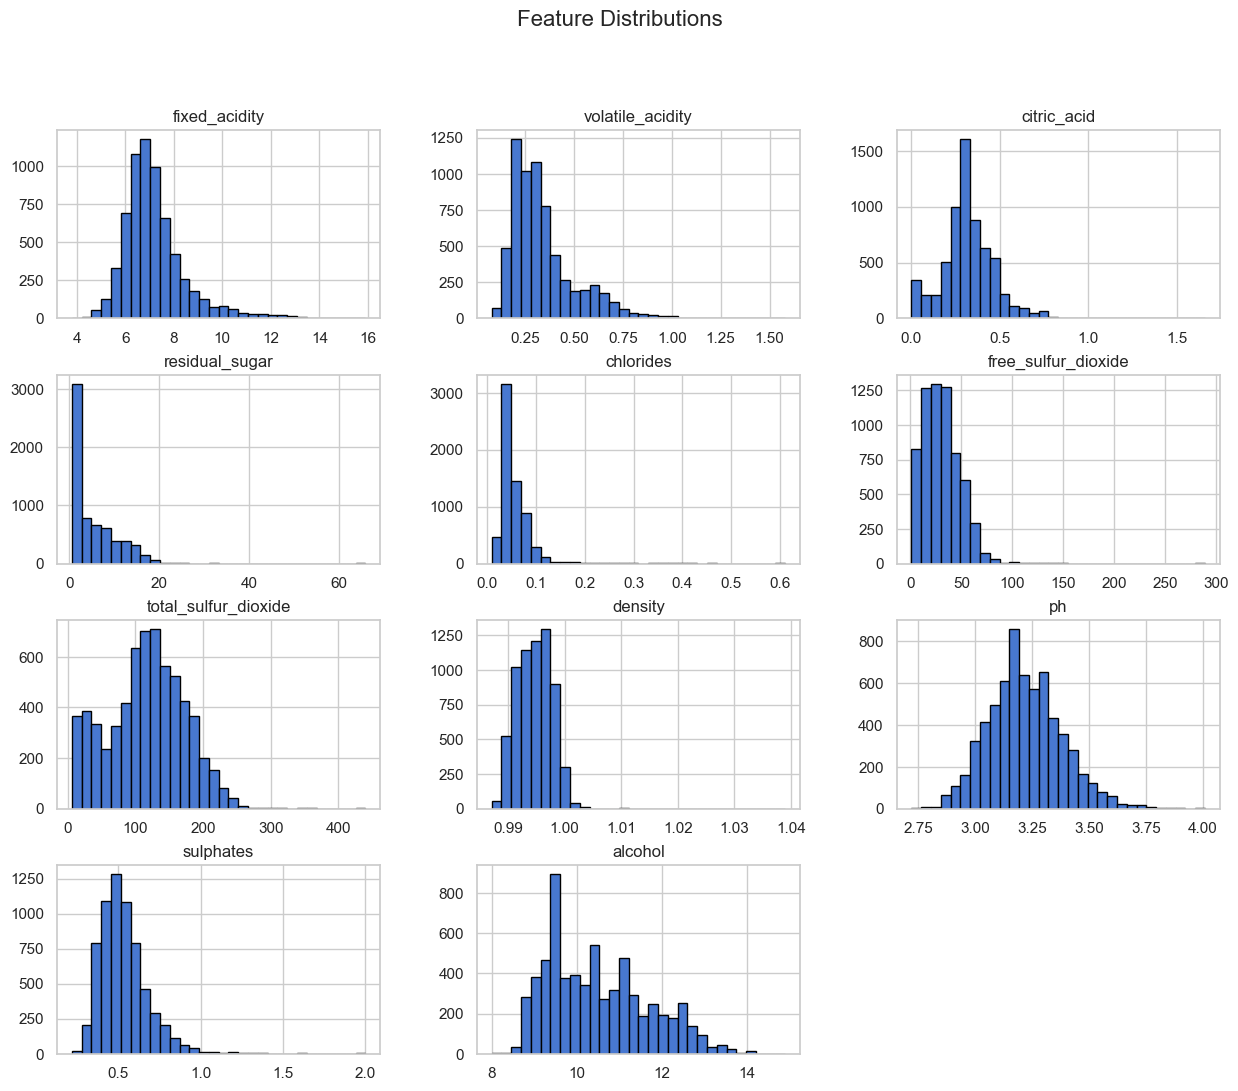

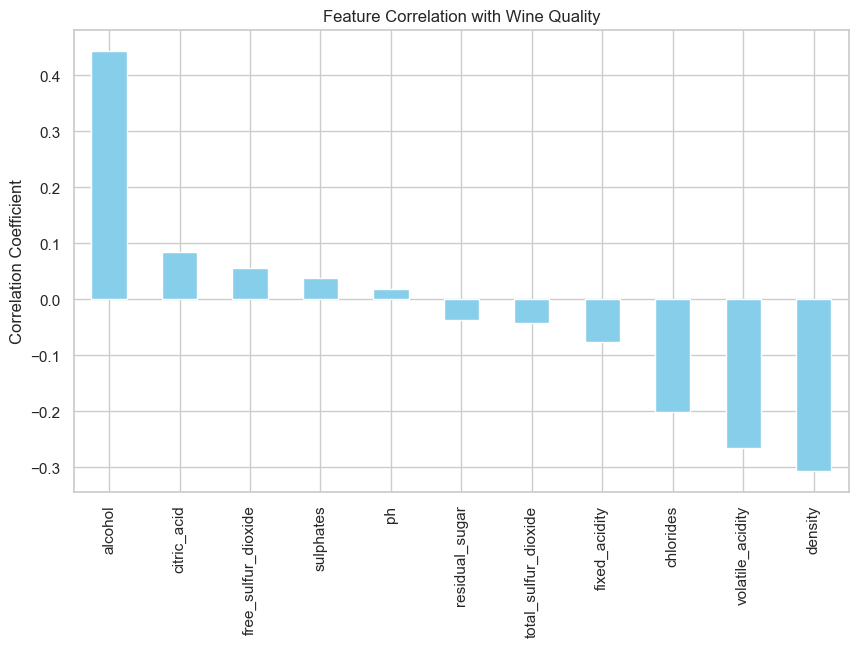

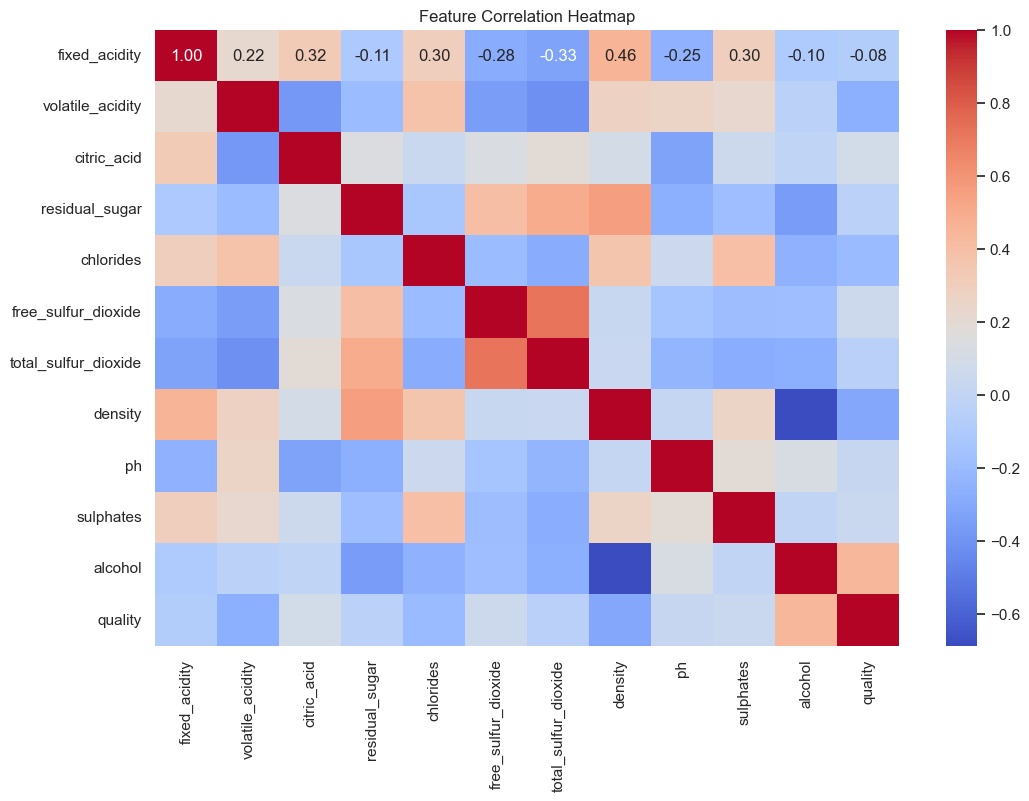

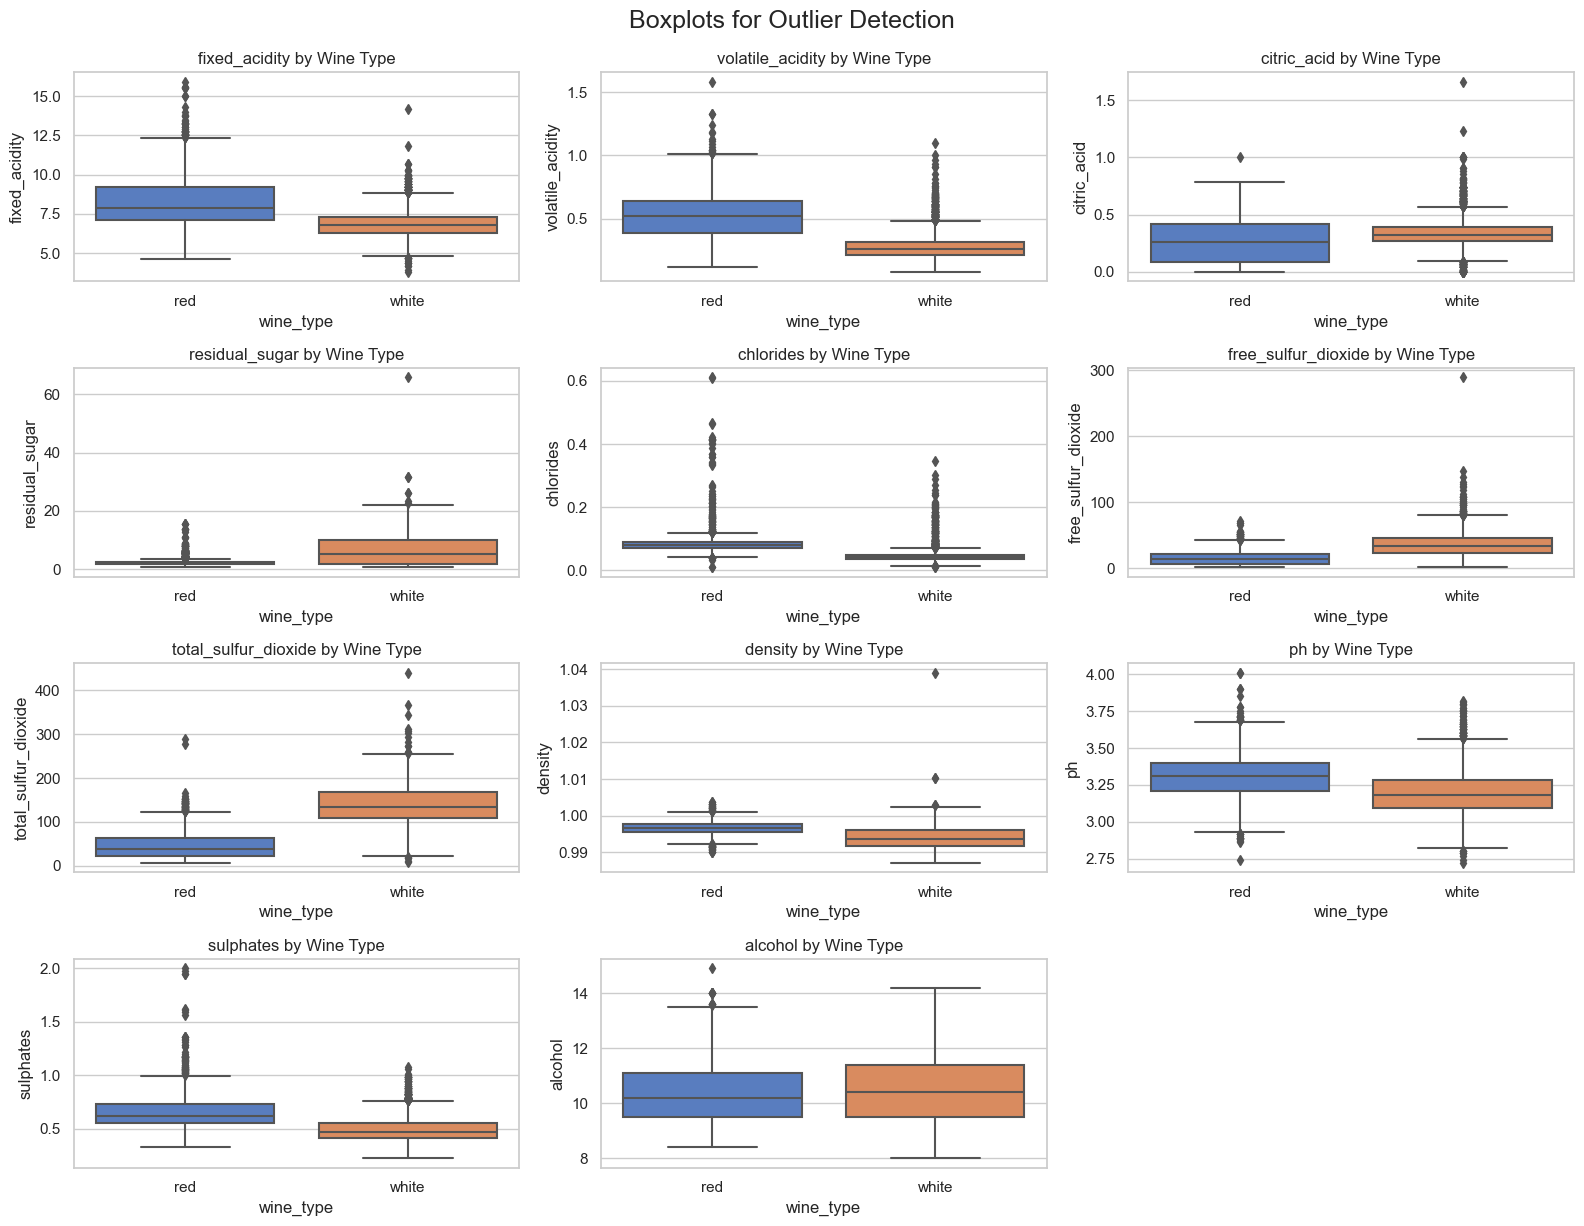

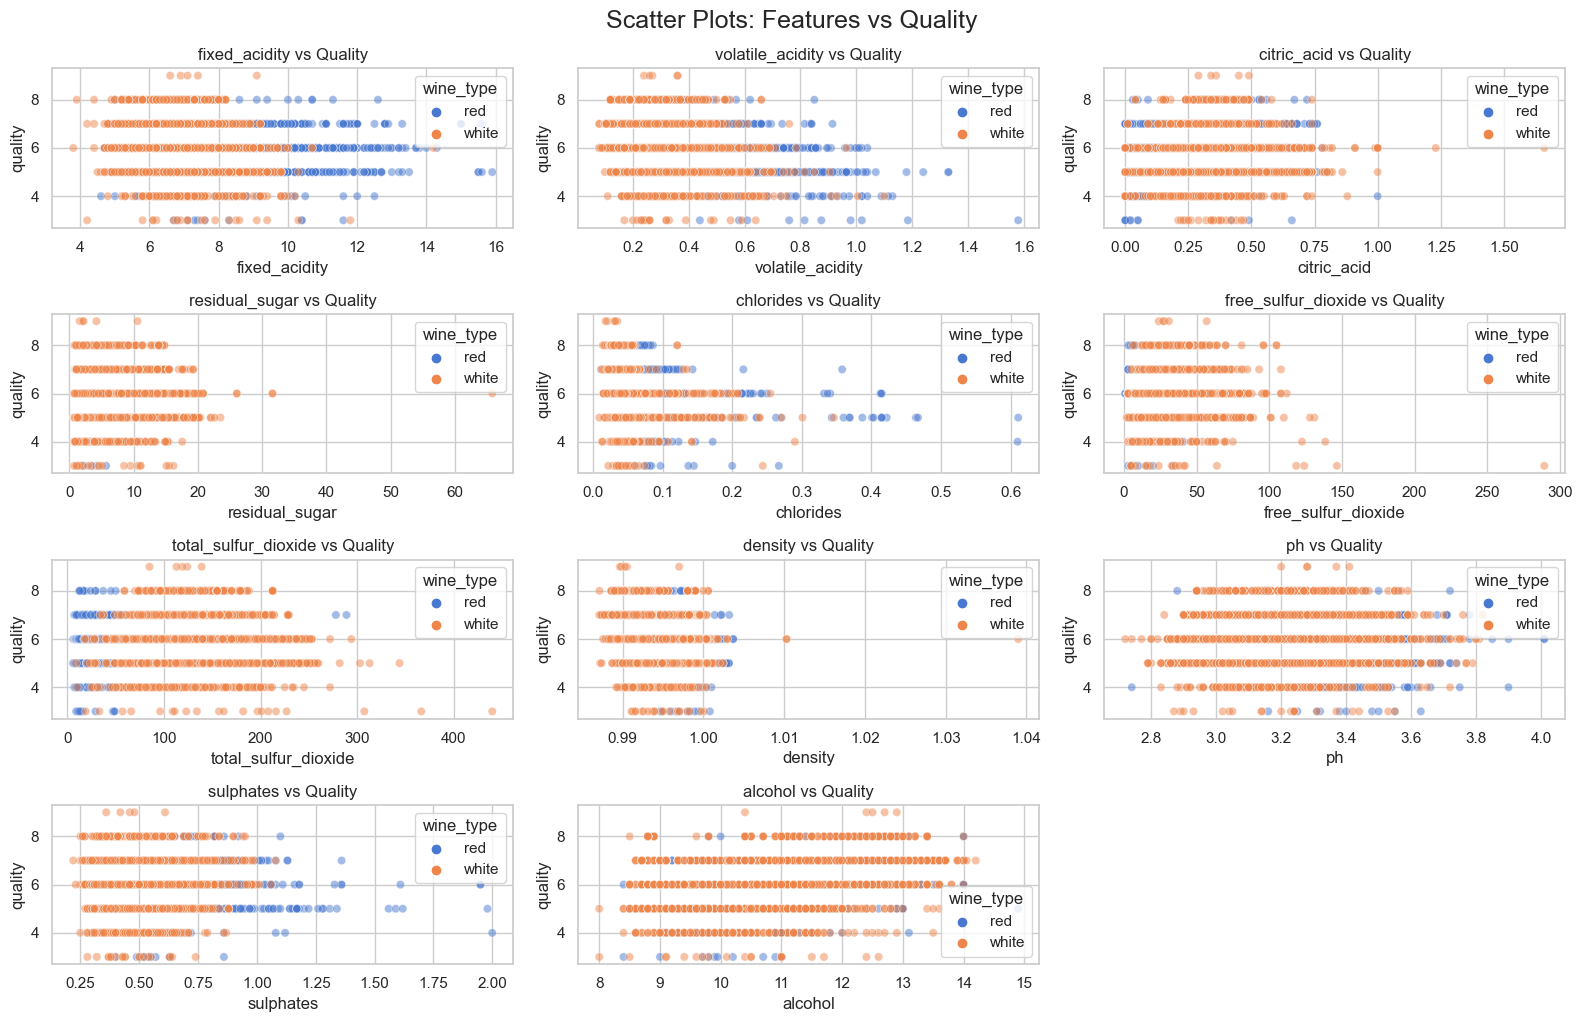

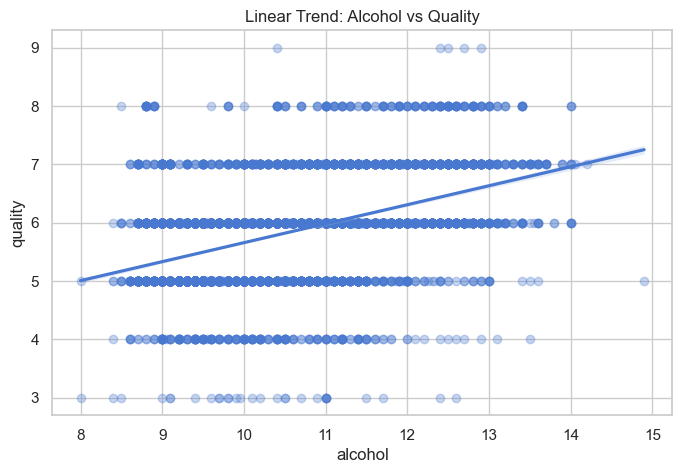

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (update the path if needed)
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add wine type label
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine the datasets
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

# Clean column names
wine_df.columns = wine_df.columns.str.lower().str.strip().str.replace(' ', '_')

# Optional: create a quality label for classification
def quality_label(q):
    if q <= 4:
        return 'low'
    elif q <= 6:
        return 'medium'
    else:
        return 'high'

wine_df['quality_label'] = wine_df['quality'].apply(quality_label)

# -------------------------------------
# 🔍 Begin EDA
# -------------------------------------

# 1. Check for class imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_df, hue='wine_type', palette='Set2')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

# 2. Feature distributions
numeric_features = wine_df.select_dtypes(include=['float64', 'int64']).columns.drop(['quality'])
wine_df[numeric_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# 3. Correlation with target
plt.figure(figsize=(10, 6))
correlations = wine_df.corr(numeric_only=True)['quality'].drop('quality')
correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = wine_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. Outlier detection with boxplots
plt.figure(figsize=(16, 12))
for idx, col in enumerate(numeric_features):
    plt.subplot(4, 3, idx+1)
    sns.boxplot(x='wine_type', y=col, data=wine_df)
    plt.title(f'{col} by Wine Type')
plt.tight_layout()
plt.suptitle('Boxplots for Outlier Detection', fontsize=18, y=1.02)
plt.show()

# 6. Scatter plots vs quality
plt.figure(figsize=(16, 10))
for idx, col in enumerate(numeric_features):
    plt.subplot(4, 3, idx+1)
    sns.scatterplot(x=col, y='quality', hue='wine_type', data=wine_df, alpha=0.5)
    plt.title(f'{col} vs Quality')
plt.tight_layout()
plt.suptitle('Scatter Plots: Features vs Quality', fontsize=18, y=1.02)
plt.show()

# 7. Linear relationship example
plt.figure(figsize=(8, 5))
sns.regplot(x='alcohol', y='quality', data=wine_df, scatter_kws={'alpha': 0.3})
plt.title('Linear Trend: Alcohol vs Quality')
plt.show()
